In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('advertising.csv')
df.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [2]:
df.describe()
mean_vals = df.mean()
median_vals = df.median()
mode_vals = df.mode().iloc[0]

mean_vals, median_vals, mode_vals


(TV           147.0425
 Radio         23.2640
 Newspaper     30.5540
 Sales         15.1305
 dtype: float64,
 TV           149.75
 Radio         22.90
 Newspaper     25.75
 Sales         16.00
 dtype: float64,
 TV           17.2
 Radio         4.1
 Newspaper     8.7
 Sales        11.9
 Name: 0, dtype: float64)

In [3]:
df.std(), df.var()

(TV           85.854236
 Radio        14.846809
 Newspaper    21.778621
 Sales         5.283892
 dtype: float64,
 TV           7370.949893
 Radio         220.427743
 Newspaper     474.308326
 Sales          27.919517
 dtype: float64)

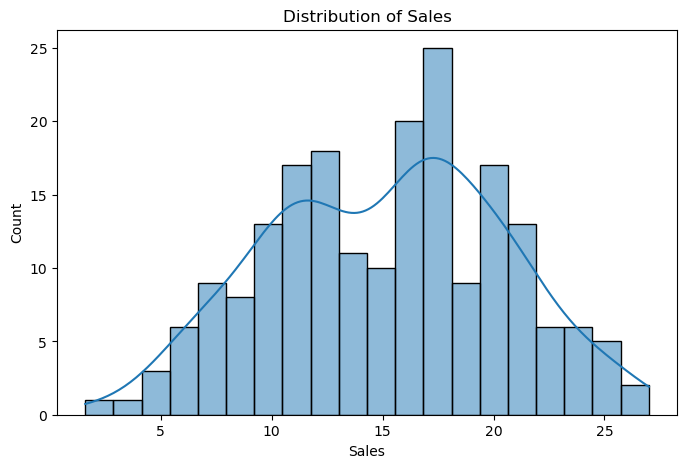

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], kde=True, bins=20)
plt.title("Distribution of Sales")
plt.show()

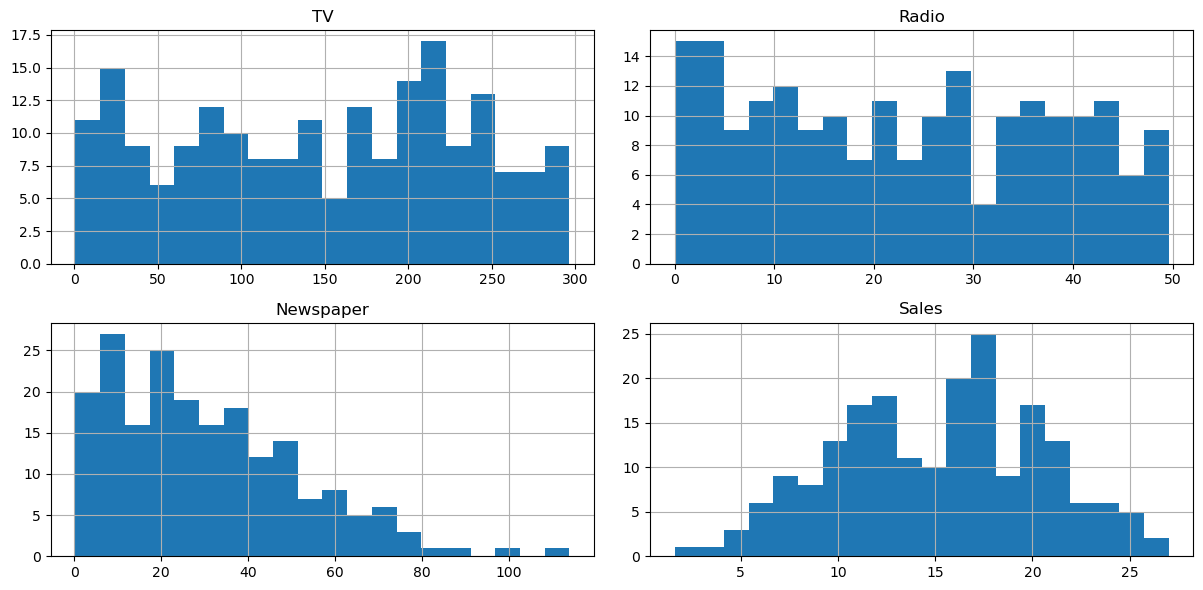

In [5]:
df.hist(figsize=(12,6), bins=20)
plt.tight_layout()
plt.show()

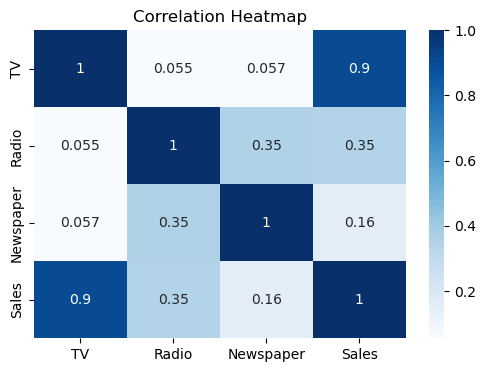

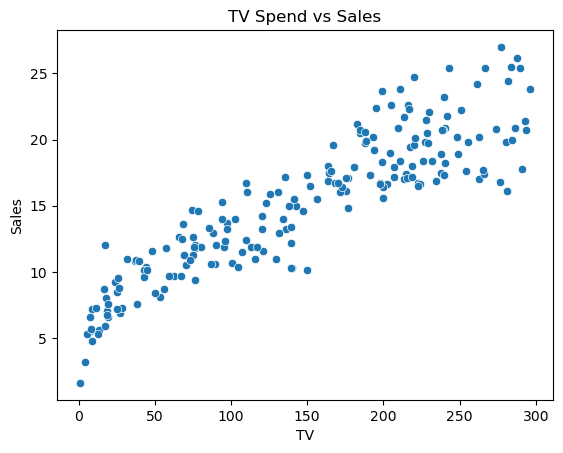

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()
df.cov()
sns.scatterplot(data=df, x='TV', y='Sales')
plt.title("TV Spend vs Sales")
plt.show()

In [21]:
high_tv = df[df['TV'] > df['TV'].median()]['Sales']
low_tv  = df[df['TV'] <= df['TV'].median()]['Sales']
t_stat, p_val = stats.ttest_ind(high_tv, low_tv, equal_var=False)
t_stat, p_val
if p_val < 0.05:
    print("Reject H0 → TV spend significantly affects sales")
else:
    print("Fail to reject H0 → No strong evidence TV spend affects sales")

Reject H0 → TV spend significantly affects sales


In [22]:
mean_sales = df['Sales'].mean()
std_sales = df['Sales'].std()
n = len(df)

ci_low, ci_high = stats.norm.interval(
    0.95,
    loc=mean_sales,
    scale=std_sales/np.sqrt(n)
)
print("The CI low Value is", ci_low)
print("The CI high Value is", ci_high)

The CI low Value is 14.398203351972288
The CI high Value is 15.862796648027714


<Axes: >

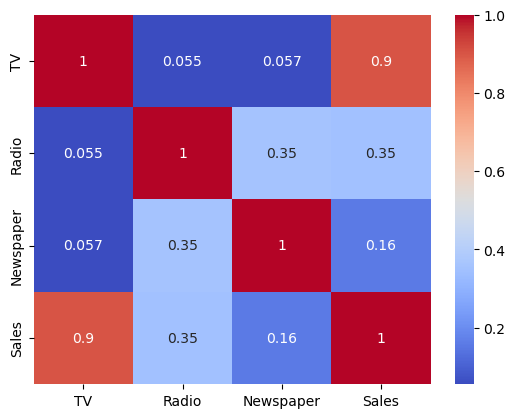

In [23]:
df.describe()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [20]:
high_radio = df[df['Radio'] > df['Radio'].median()]['Sales']
low_radio  = df[df['Radio'] <= df['Radio'].median()]['Sales']

result = stats.ttest_ind(high_radio, low_radio)

print("T-test result for Radio groups")
print("T-statistic:", result.statistic)
print("P-value:", result.pvalue)

T-test result for Radio groups
T-statistic: 3.8902996821472744
P-value: 0.000136681009829157


In [24]:
ci_low, ci_high = stats.norm.interval(
    0.95,
    loc=df['Sales'].mean(),
    scale=df['Sales'].std() / np.sqrt(len(df))
)

print("95% Confidence Interval for Sales")
print("Lower bound:", ci_low)
print("Upper bound:", ci_high)

95% Confidence Interval for Sales
Lower bound: 14.398203351972288
Upper bound: 15.862796648027714
